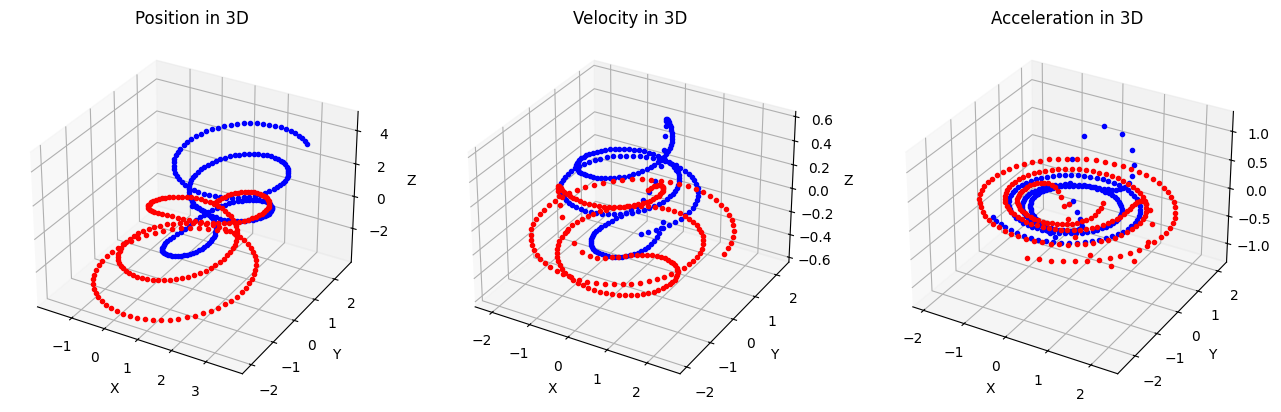

In [26]:
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, v1, q1, m1, B, r1, v2, q2, m2, r2, t_end=20, num_steps=200):
        self.v1 = np.array(v1, dtype=np.float64)
        self.q1 = q1
        self.m1 = m1
        self.B = B
        self.r1 = np.array(r1, dtype=np.float64)
        self.v2 = np.array(v2, dtype=np.float64)
        self.q2 = q2
        self.m2 = m2
        self.r2 = np.array(r2, dtype=np.float64)
        self.t_end = t_end
        self.num_steps = num_steps

    def simulate_motion(self):
        def aMagnetic(v, B, q, m):
            return (q / m) * np.cross(v, B)
        
        def aElectric(r1, r2, q1, q2, m):
            distance = np.linalg.norm(r2 - r1)
            direction = (r2 - r1) / distance
            return (1 / m) * q1 * q2 * direction / distance**2

        t = np.linspace(0, self.t_end, self.num_steps)
        r1 = np.zeros((len(t), 3))
        r2 = np.zeros((len(t), 3))
        v1 = np.zeros((len(t), 3))
        v2 = np.zeros((len(t), 3))
        a1 = np.zeros((len(t), 3))
        a2 = np.zeros((len(t), 3))

        v1[0] = self.v1
        r1[0] = self.r1
        v2[0] = self.v2
        r2[0] = self.r2

        for i in range(1, len(t)):
            a_magnetic1 = aMagnetic(v1[i-1], self.B, self.q1, self.m1)
            a_electric1 = aElectric(r1[i-1], r2[i-1], self.q1, self.q2, self.m1)
            a_total1 = a_magnetic1 + a_electric1
            v1[i] = v1[i-1] + a_total1 * (t[i] - t[i-1])
            r1[i] = r1[i-1] + v1[i-1] * (t[i] - t[i-1]) + 0.5 * a_total1 * (t[i] - t[i-1])**2
            a1[i] = a_total1

            a_magnetic2 = aMagnetic(v2[i-1], self.B, self.q2, self.m2)
            a_electric2 = aElectric(r2[i-1], r1[i-1], self.q2, self.q1, self.m2)
            a_total2 = a_magnetic2 + a_electric2
            v2[i] = v2[i-1] + a_total2 * (t[i] - t[i-1])
            r2[i] = r2[i-1] + v2[i-1] * (t[i] - t[i-1]) + 0.5 * a_total2 * (t[i] - t[i-1])**2
            a2[i] = a_total2

        return r1, v1, a1, r2, v2, a2

    def plot_motion(self):
        r1, v1, a1, r2, v2, a2 = self.simulate_motion()

        fig, ax = plt.subplots(1,3,figsize=(16,5),subplot_kw={'projection':'3d'})
        
        # Position graphs
        ax[0].plot(r1[:, 0], r1[:, 1], r1[:, 2],'b.', label='Particle 1 Position')
        ax[0].plot(r2[:, 0], r2[:, 1], r2[:, 2], 'r.', label='Particle 2 Position')
        ax[0].set_xlabel('X')
        ax[0].set_ylabel('Y')
        ax[0].set_zlabel('Z')
        ax[0].set_title('Position in 3D')
        
        # Velocity graphs
        ax[1].plot(v1[:, 0], v1[:, 1], v1[:, 2],'b.', label='Particle 1 Velocity')
        ax[1].plot(v2[:, 0], v2[:, 1], v2[:, 2], 'r.', label='Particle 2 Velocity')
        ax[1].set_xlabel('X')
        ax[1].set_ylabel('Y')
        ax[1].set_zlabel('Z')
        ax[1].set_title('Velocity in 3D')
        
        # Acceleration graphs
        ax[2].plot(a1[:, 0], a1[:, 1], a1[:, 2],'b.', label='Particle 1 Acceleration')
        ax[2].plot(a2[:, 0], a2[:, 1], a2[:, 2], 'r.', label='Particle 2 Acceleration')
        ax[2].set_xlabel('X')
        ax[2].set_ylabel('Y')
        ax[2].set_zlabel('Z')
        ax[2].set_title('Acceleration in 3D')
        
        plt.savefig('./grafica.jpg')

# Example usage
v1 = np.array([1, 0, 0])
q1 = 1
m1 = 1
B = np.array([0, 0, 1])
r1 = np.array([1, 0, 1])  # Initial position for particle 1
v2 = np.array([0, 1, 0])  # Initial velocity for particle 2
q2 = 1
m2 = 1
r2 = np.array([1, 1, 0])  # Initial position for particle 2

particle = Particle(v1, q1, m1, B, r1, v2, q2, m2, r2)
particle.plot_motion()